<a href="https://colab.research.google.com/github/chaiwencw/CPO-Price-Forecasting-Using-Simulated-Annealing-based-Support-Vector-Regression/blob/main/Copy_of_FYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

.# Section 0: Import Packages

In [ ]:
# uncomment the code below to install the plotly package if it is not detected in the current environment
# pip install plotly 

In [ ]:
import pandas as pd                                   # to deal with pandas dataframe
import numpy as np                                    # to deal with numbers
import datetime as dt                                 # to deal with datetime data
import time                                           # to record execution time
from math import ceil                                 # ceiling function for calculation
import plotly.graph_objects as go                     # to plot graphs
from matplotlib import pyplot as plt                  # to plot graphs
from statsmodels.graphics import tsaplots             # to plot graphs
from sklearn.preprocessing import PowerTransformer    # to make data more Gaussian-like
from sklearn.model_selection import train_test_split  # to split data arrays into two subsets
#from SA_parameter_optimization import *               # import all (methods, variables...) from SA_parameter_optimization

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Section 1: Data Pre-processing
This section shows importing necessary packages, and data importation and cleaning.

## Section 1.1: Import Data


In [ ]:
# data = pd.read_csv('FYP_Data.csv', na_values='-') 
data = pd.read_csv('https://raw.githubusercontent.com/jc-usm/FYP-USM_2021-2022/main/FYP_Data.csv', na_values='-')              # read FCPO dataset
data['Date'] = pd.to_datetime(data['Date'], format="%d/%m/%Y")  # convert Date column to datatime format
data.head()                                                     # show the first 5 rows of the data for review

,Date,Open,Close,High,Low,Volume,Percentage Change
0,2018-01-02,2466,2472,2481,2466,100.0,0.0115
1,2018-01-03,2476,2555,2555,2476,500.0,0.0336
2,2018-01-04,2538,2542,2551,2533,470.0,-0.0051
3,2018-01-05,2554,2570,2561,2527,250.0,0.0110
4,2018-01-08,2541,2590,2572,2530,160.0,0.0078


* Open: Price when the market begin
* Close: Price when the market closed
* High: Highest price reached during that day
* Low: Lowest price traded on that day
* Volume: Total amount traded on that day
* Percentage Change: 

## Section 1.2: Data Cleaning

In [ ]:
data.info()                                                     # print information summary of the dataset 
null = data.isnull().sum()                                      # find the total no. of missing values in each column
df_null = pd.DataFrame(data = null, columns = ['No. of Null'])  # create a dataframe to show the number of null
print('\n\n', df_null)                                          # number of null in each column is shown
print(f'\n\nThe total no. of null is  {sum(null)}')             # the total number of null is shown

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1099 non-null   datetime64[ns]
 1   Open               1099 non-null   int64         
 2   Close              1099 non-null   int64         
 3   High               1099 non-null   int64         
 4   Low                1099 non-null   int64         
 5   Volume             1038 non-null   float64       
 6   Percentage Change  1099 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 60.2 KB


                    No. of Null
Date                         0
Open                         0
Close                        0
High                         0
Low                          0
Volume                      61
Percentage Change            0


The total no. of null is  61


In [ ]:
data_cleaned = data.dropna()  # drop all missing values 
data_cleaned.info()           # check the dataset information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038 entries, 0 to 1098
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1038 non-null   datetime64[ns]
 1   Open               1038 non-null   int64         
 2   Close              1038 non-null   int64         
 3   High               1038 non-null   int64         
 4   Low                1038 non-null   int64         
 5   Volume             1038 non-null   float64       
 6   Percentage Change  1038 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 64.9 KB


# Section 2: Exploratory Data Analysis




## Section 2.1: Descriptive Statistics

In [ ]:
# Determine the summary statistics of the date column
data_cleaned.Date.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                    1038
unique                   1038
top       2018-01-02 00:00:00
freq                        1
first     2018-01-02 00:00:00
last      2022-06-30 00:00:00
Name: Date, dtype: object

In [ ]:
# Determine the summary statistics of data_cleaned (by default numerical columns)
data_cleaned.describe()


,Open,Close,High,Low,Volume,Percentage Change
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000
mean,3337.011561,3342.454721,3374.040462,3307.328516,583.362235,0.001161
std,1451.358827,1458.561937,1482.938995,1427.494086,613.481902,0.020299
min,1751.000000,1775.000000,1782.000000,1750.000000,0.000000,-0.100200
25%,2186.250000,2189.000000,2200.250000,2179.000000,110.000000,-0.009575
50%,2663.000000,2655.000000,2684.500000,2646.000000,370.000000,0.001200
75%,4266.000000,4244.750000,4303.750000,4210.750000,907.500000,0.012575
max,8200.000000,8163.000000,8757.000000,7780.000000,3850.000000,0.109100


In [ ]:
# Determine the minimum, maximum, average and standard deviation of each numerical column in each year
for col in data_cleaned.select_dtypes(exclude=['datetime64[ns]']).columns:
  desc_stat = data_cleaned.groupby(data_cleaned.Date.dt.year)[[col]].agg(['min','max','mean','std'])
  print(f'\nDescriptive Statistics of:{desc_stat}')
  print("\n")


Descriptive Statistics of:      Open                               
       min   max         mean         std
Date                                     
2018  1751  2563  2258.862222  205.414897
2019  1870  3113  2171.615741  261.813755
2020  2014  3882  2799.134454  455.263478
2021  3457  5437  4460.535270  531.066003
2022  4740  8200  6316.288136  762.535358



Descriptive Statistics of:     Close                               
       min   max         mean         std
Date                                     
2018  1775  2590  2258.480000  207.998242
2019  1865  3097  2172.027778  264.646142
2020  2000  3891  2804.147059  460.857199
2021  3470  5446  4469.626556  533.961564
2022  4688  8163  6335.466102  774.109178



Descriptive Statistics of:      High                               
       min   max         mean         std
Date                                     
2018  1782  2591  2272.866667  202.320997
2019  1870  3118  2186.550926  265.310607
2020  2020  3900  2827.382353  46

From the descriptive statistics, one can see a sharp increase of CPO price in 2021. 

## Section 2.2: Data Visualization

In [ ]:
# candlestick plot (with range slider)
fig = go.Figure(data=[go.Candlestick(x=data_cleaned['Date'],
                open=data_cleaned['Open'],
                high=data_cleaned['High'],
                low=data_cleaned['Low'],
                close=data_cleaned['Close'],
                increasing_line_color= 'green', 
                decreasing_line_color= 'red')])
fig.update_yaxes(autorange = True,fixedrange=False)   # add this line for y-axis rescaling
fig.update_layout(title='Crude Palm Oil Futures (FCPO) Candlestick Chart')
# fig.update_layout(title='Crude Palm Oil Futures (FCPO) Candlestick Chart', 
#                   yaxis_title='Price (MYR/tonne)',
#                   shapes = [dict(x0='2020-12-25', x1='2021-01-10', y0=0, y1=1, xref='x', yref='paper',line_width=0)],
#                   annotations=[dict(x='2021-01-04',y=0.05, xref='x', yref='paper', 
#                                     showarrow=False, xanchor='left', text='')])
fig.show()


The above shows the candlestick plot of CPO historical price with a range slider. To observe the price change, we can zoom in by simply dragging the handles of the range slider. When x-range (date) changes, we can manually rescale the y-axis.

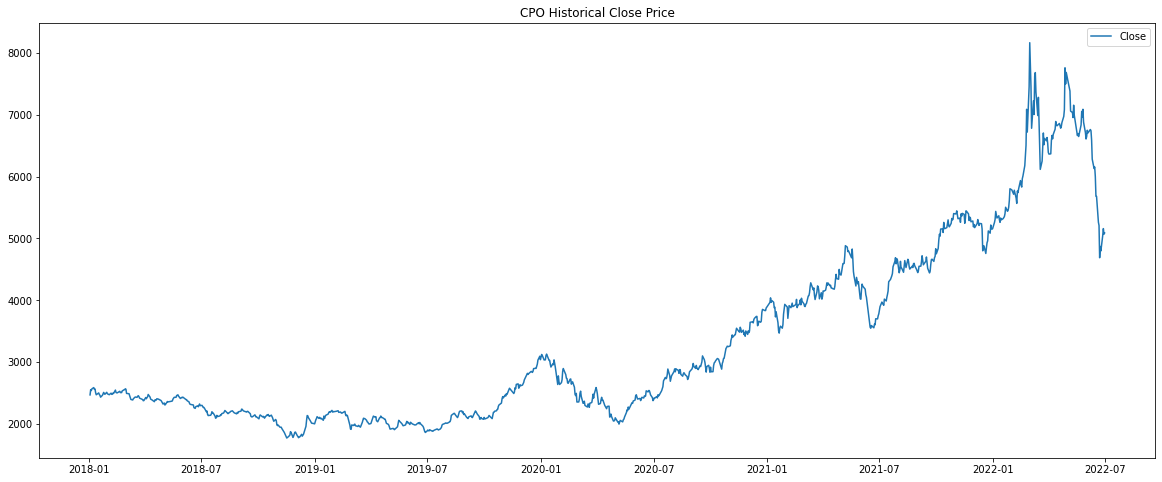

In [ ]:
# Plot the actual close price over certain number of periods
plt.figure(figsize = (20,8))
plt.plot(data_cleaned['Date'], data_cleaned['Close'],label='Close')
plt.legend(loc=0)
plt.title('CPO Historical Close Price')
plt.show()

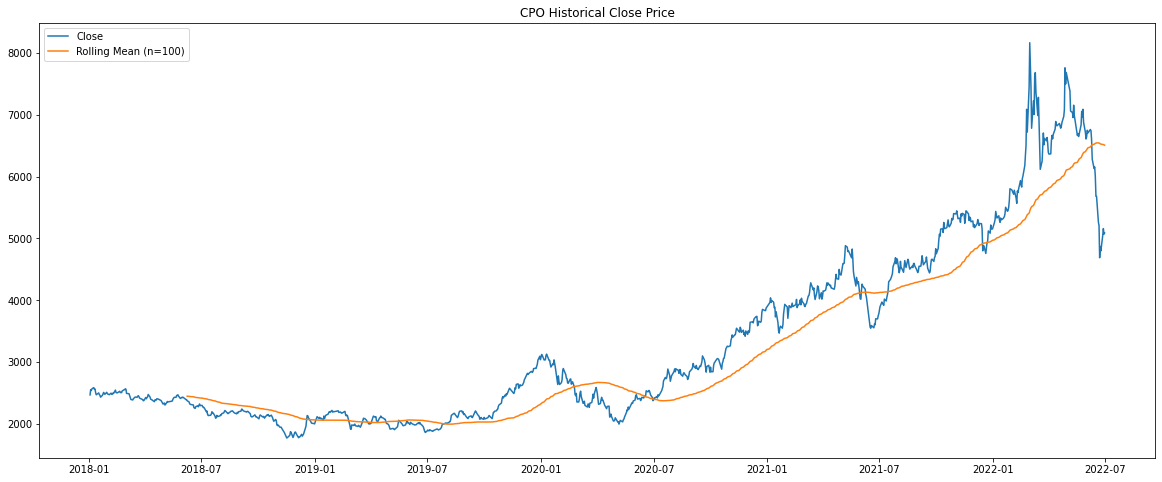

In [ ]:
# plot the actual close price and its rolling mean over certain number of previous periods
plt.figure(figsize = (20,8))
plt.plot(data_cleaned['Date'], data_cleaned['Close'],label='Close')
plt.plot(data_cleaned['Date'],data_cleaned['Close'].rolling(100).mean(),label='Rolling Mean (n=100)')
# plt.plot(data_cleaned['Date'],data_cleaned['Close'].rolling(200).mean(),label='Rolling Mean (n=200)')
plt.legend(loc=0)
plt.title('CPO Historical Close Price')
plt.show()

The rolling mean plot here is the average prices over a defined number of previous periods (last 'n' values) in a time series. It helps us detect CPO close price trends and notice the peak more easily and evidently. The plot above clearly shows the increasing trend of CPO price, starting from the middle of 2020 until the first quarter of 2022.

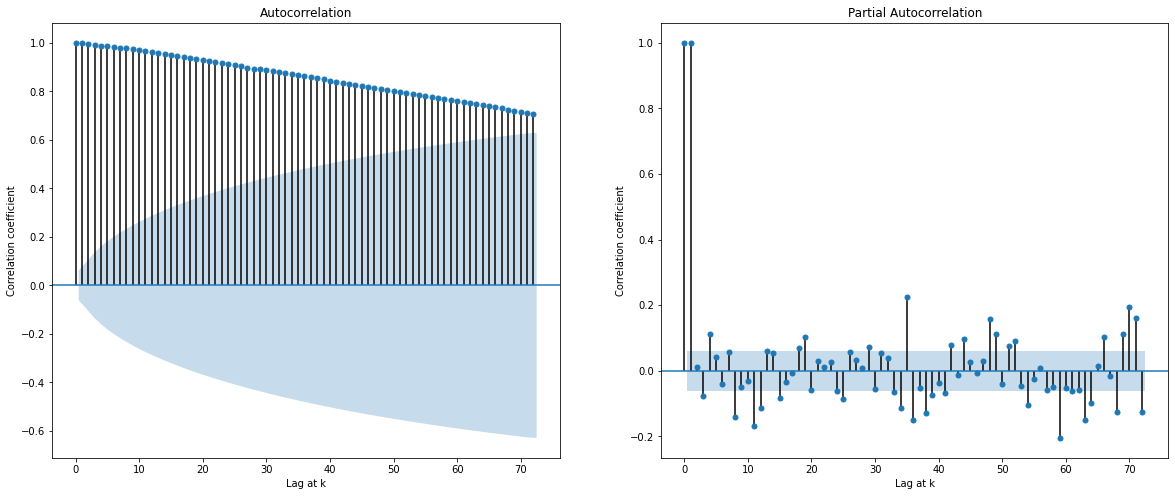

In [ ]:
fig, ax= plt.subplots(1,2,figsize=(20, 8))
# Autocorrelation plot
fig=tsaplots.plot_acf(data_cleaned['Close'], lags=72, alpha=0.05, ax=ax[0])
# Partial autocorrelation plot
fig=tsaplots.plot_pacf(data_cleaned['Close'], lags=72,  alpha=0.05, ax=ax[1])
for i in ax.flat:
    i.set(xlabel='Lag at k', ylabel='Correlation coefficient')
plt.show()

PCAF-preliminarily identify appropriate lag structure
-> from the plot, we find the time-lag value. From the plot above, lag 1 is prominent and above confidence level -> the correlation at lag 1 is significant and positive.


# Section 3  Feature Engineering & Data Splitting & Tranformation

## Section 3.1 Lag Features

In [ ]:
# create lag features: previous day open, high, low, close prices & volume & percentage change 
new_data = data_cleaned.copy()
for col in new_data.drop({'Open','Date', 'Close'}, axis=1).columns:
  new_data[f'Prev_{col}'] = new_data[col].shift(periods=1)
  new_data = new_data.drop(columns = col, axis=1) 

In [ ]:
# remove first row of dataset
new_data = new_data.iloc[1:,:] 

## Section 3.2 Date-Related Features

In [ ]:
# extract year, month, day etc. from Date
newdate = new_data['Date']
exact_trading_date = pd.DataFrame({'Year': newdate.dt.year,
                                    'Month': newdate.dt.month,
                                    'Day_of_Month': newdate.dt.day,
                                    'Day_of_Year': newdate.dt.dayofyear,
                                    'Week_of_Year': newdate.dt.isocalendar().week,
                                    'Day_of_Week': newdate.dt.isocalendar().day,
                                    'Weekday': newdate.dt.weekday,
                                    'Quarter': newdate.dt.quarter,
                                    })
new_data = pd.concat([exact_trading_date, new_data], axis = 1)
new_data = new_data.set_index('Date')
new_data.head()

,Year,Month,Day_of_Month,Day_of_Year,Week_of_Year,Day_of_Week,Weekday,Quarter,Open,Close,Prev_High,Prev_Low,Prev_Volume,Prev_Percentage Change
Date,,,,,,,,,,,,,,
2018-01-03,2018,1,3,3,1,3,2,1,2476,2555,2481.0,2466.0,100.0,0.0115
2018-01-04,2018,1,4,4,1,4,3,1,2538,2542,2555.0,2476.0,500.0,0.0336
2018-01-05,2018,1,5,5,1,5,4,1,2554,2570,2551.0,2533.0,470.0,-0.0051
2018-01-08,2018,1,8,8,2,1,0,1,2541,2590,2561.0,2527.0,250.0,0.0110
2018-01-09,2018,1,9,9,2,2,1,1,2563,2562,2572.0,2530.0,160.0,0.0078


## Section 3.3 Data Splitting & Transformation

In [ ]:
# specify feature columns and the target
features = new_data.drop(columns = ['Close'])
target = np.array(new_data['Close'])

In [ ]:
# split the dataset into two subsets: training set & test set 
target = target.reshape(len(target), 1)
x_train, x_test, y_train, y_test = train_test_split(features, target, train_size = 0.10, shuffle = False)

# check the shape of x_train, x_test, y_train, y_test
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((103, 13), (934, 13), (103, 1), (934, 1))

In [ ]:
print(f'The range of target values: Max - Min = {target.max()} - {target.min()} = {target.max()-target.min()}')

The range of target values: Max - Min = 8163 - 1775 = 6388


In [ ]:
# save the date of test set (for time series plot after predictions)
time_index = x_test.reset_index()[['Date']] 

In [ ]:
# scale the training data using PowerTransformer()
scalerX = PowerTransformer().fit(x_train)
scalerY = PowerTransformer().fit(y_train)

# producing a series with transformed values that has the same axis length.
x_train = scalerX.transform(x_train)
y_train = scalerY.transform(y_train)
x_test = scalerX.transform(x_test)
y_test = scalerY.transform(y_test)

# change the multi-dimensional array into a contiguous flattened array (same data type as the input array)
y_train = np.ravel(y_train) 
y_test = np.ravel(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [ ]:
print(f'Range of transformed target values in training set: {y_train.min(), y_train.max()}')
print(f'\nRange of transformed target values in test set: {y_test.min(), y_test.max()}')

Range of transformed target values in training set: (-2.141072849700036, 2.0936892079027567)

Range of transformed target values in test set: (-13.033353152614465, 30.89926962270223)


# Section 4: Analysis

In [ ]:
# to import the SVR model for price prediction
from sklearn.svm import SVR
# to import different evaluation metrics for regression problem
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

# each evaluation metric is assigned to a shorter name for easy reference
MAE = mean_absolute_error
MAPE = mean_absolute_percentage_error
MSE = mean_squared_error
R2 = r2_score


def RegressionMetric(valid_data, predictions):
    """
    Produce 4 different evaluation metrics at once

    valid_data - Testing Value
    predictions - Predicted Value
    """

    # each eveluation metric is contained in a list
    metrics = [MAE, MAPE, MSE, R2]
    # create an empty list to keep all eveluation metrics
    metric_value = []
    # loop through different evaluation metrics and output the value
    for metric in metrics:
        metric_value.append(metric(valid_data, predictions))
    print("MAE:\t", metric_value[0])
    print("MAPE:\t", metric_value[1]) 
    print("RMSE:\t", np.sqrt(metric_value[2]))
    print("r2:\t", metric_value[3])


def model_training(Xtrain, Ytrain, Xvalid, Yvalid, current_parameters = None, constant_parameters = None):
    """
    Train the model with given set of hyperparameters and output metric

    current_parameters - Dict of hyperparameters and chosen values
    constant_parameters - Dict of hyperparameters that are kept constant
    Xtrain - Training Features
    Xvalid - Testing Features
    Ytrain - Training Value
    Yvalid - Testing Value
    """

    # to avoid assignment of closure object
    if current_parameters is None: current_parameters = {}
    if constant_parameters is None: constant_parameters = {}
    # copy the constant parameters dictionary
    parameters_copy = constant_parameters.copy()
    # combine the two constant and current parameters dictionary
    parameters_copy.update(current_parameters)
    # "**" is used to input a dict that contains all the key which are same as the arguments of the mdoel    
    model = SVR(**parameters_copy)
    # "fit" is used to train the model
    model.fit(Xtrain, Ytrain)
    # "predict" is used to make prediction
    predictions = model.predict(Xvalid)
    # MSE of the model is obtained
    metric_value = MSE(Yvalid, predictions)

    return metric_value


def parameters_choosing(potential_parameters, size_potential_parameters, current_parameters = None):
    """
    Function to choose parameters for next iteration
    
    Inputs:
    potential_parameters - Ordered dictionary of parameter search space
    current_parameters - Dict of current parameters
    size_potential_parameters - size of parameters search space

    Output:
    Dictionary of New Parameters
    """

    #when current parameters is non-empty dict
    if current_parameters:
        # copy current parameters dict to another dict called "new parameters"
        new_parameters = current_parameters.copy()
        # change the "keys" of the potential parameters dict into list
        potential_param_keys = [*potential_parameters.keys()]
        # randomly choose one parameter to be updated
        param_to_update = np.random.choice(potential_param_keys)
        # obtain the potential values for the parameter-to-be-updated
        potential_param_values = potential_parameters[param_to_update]
        # obtain the number of potential parameters
        no_potential_param_val = size_potential_parameters[param_to_update]
        # randomely generate one number as index out of theof the potential parameters
        random_index = np.random.randint(1, no_potential_param_val)
        # find the current index of the value of the parameter-to-be-updated
        curr_param_val_index = potential_param_values.index(current_parameters[param_to_update])
        # calculate the new index
        new_index = curr_param_val_index + np.random.choice([-1, 1])*random_index

        # try this block of code if there is no index error and a new paramater value will be assigned
        try:
            new_parameters[param_to_update] = potential_param_values[new_index]
        # if index is out of the range, then an IndexError is raised
        # new parameter is randomly assigned to either the first or the last value of potential parameters
        except IndexError:
            new_parameters[param_to_update] = potential_param_values[np.random.choice([-1, 0])]

    # when current parameters is empty dict
    else:
        # create a new empty dict
        new_parameters = {}
        # randomly assign the potential values to the parameters
        for key, value in potential_parameters.items():
            new_parameters[key] = np.random.choice(value)
        
    return new_parameters


# Function for the Metropolis formula in the simulated annealing process
def metropolis_formula(temperature, current_metric, previous_metric):

    # one random number is generated using the uniform function
    random_number = np.random.uniform()
    # the difference between the current and previous metrics is obtained
    difference = current_metric - previous_metric
    # the value of metropolis formula is obatined
    metropolis_val = np.exp(- difference / temperature)
    return random_number, difference, metropolis_val


def simulate_annealing(param_dict, constant_params, size_param_dict,
                        X_train, Y_train,  X_valid, Y_valid, 
                        no_iters = 100, alpha = 0.95,  
                        initial_temperature = 100, min_temperature = 20,
                       previous_params = None):
    """
    Function to perform hyperparameter search using simulated annealing (minimization)

    Inputs:
    param_dict - Dictionary of parameter search space
    const_param - Static parameters of the model
    size_param_dict - size of parameters search space
    Xtrain - Training Features
    Xvalid - Testing Features
    Ytrain - Training Value
    Yvalid - Testing Value
    no_iters - Number of iterations to perform the parameter search
    alpha - factor to reduce temperature
    initial_temperature - Initial temperature
    min_temperature - Minimum temperature
    
    Output:
    Dataframe of the parameters explored and corresponding model performance
    """
    T = initial_temperature
    T_min = min_temperature
    prev_params = previous_params
    
    # create an empty dataframe to store the result
    columns_name = ["Number of Temperature Reductions"] + ["Current Temperature"] + [*param_dict.keys()] + ['Metric', 'Best Metric']
    results = pd.DataFrame(columns = columns_name)
    result_list = []
    
    # Obtain an initial evaluation metric using the default parameters
    ori_metric = model_training(X_train, Y_train, X_valid, Y_valid)
    # set the initial evaluation metric as local minima
    prev_metric = ori_metric
    # set the initial evaluation metric as global minima
    best_metric = ori_metric
    
    # create an empty set to store the visited parameters
    hash_values = set()
    
    # create a counter for number of temperature drops
    j = 0

    # run the loop if the minimum temperature is not reached
    while T >= T_min:
        print("Current Temperature is: %.2f" %T)
        print("\n")
        
        # check if the number of iterations is reached
        for i in range(no_iters):
            print('Iteration ' + str(i + 1))

            # choose a new set of parameters
            curr_params = parameters_choosing(param_dict, size_param_dict, prev_params)
            
            # convert parameters' value to tuple
            hash_val = tuple(curr_params.values())

            # check if the parameters is repeated
            if hash_val in hash_values:
                print('Combination revisited.')
                print('\n\n')

            else:
                hash_values.add(hash_val)
                
                # obtain new evaluation metric
                metric = model_training(X_train, Y_train, X_valid, Y_valid, curr_params, constant_params)

                # check if the new metric value is smaller than the local minima 
                if metric < prev_metric:
                    print('Local Improvement in metric from {:8.6f} to {:8.6f} '
                            .format(prev_metric, metric) + ' - parameters accepted' + '\n')
                    prev_metric = metric
                    prev_params = curr_params.copy()
                    
                    # check if the new metric value is smaller than the global minima
                    if metric < best_metric:
                        print('Global Improvement in metric from {:8.6f} to {:8.6f} '
                                .format(best_metric, metric) + ' - best parameters updated' + '\n\n')
                        best_metric = metric
                
                # use metropolis formula to decide whether to accept the new set of parameters
                else:
                    random_no, diff, Metropolis = metropolis_formula(T,metric, prev_metric)
                    
                    if random_no < Metropolis:
                        print("No Improvement but parameters are ACCEPTED.") 
                        prev_metric = metric
                        prev_params = curr_params
                        
                    else:
                        print("No Improvement and parameters are REJECTED.") 
                    
                    print("Metric change:   %.6f" % diff)
                    print("Threshold:       %.6f" % Metropolis)
                    print("Random Number:   %.6f" % random_no)
                    print('\n')

            # store the result into the dataframe
            results.loc[i, "Number of Temperature Reductions"] = j
            results.loc[i, [*curr_params.keys()]] = [*curr_params.values()]
            results.loc[i, 'Metric'] = metric
            results.loc[i, 'Best Metric'] = best_metric
            print("\n")
        
        results.loc[:, "Current Temperature"] = T
        result_copy = results.copy()
        result_list.append(result_copy)
        
        # reduce the temperature with the pre-defined cooling factor
        T = alpha * T

        print("Temperature has been reduced.")
        print("Number of Temperature Reductions: " + str(j + 1))
        j = j + 1

        # check if the minimum temperature is reached
        if T < T_min: print("Minimum temperature is reached. The algorithm is terminated.")

    # combine the result of for each temperature
    final_result = pd.concat(result_list)
        
    return final_result

def inverse_transformation(test_data, prediction_data, transformation, index_data, index_name = 'Date'):
    """
    Function to inverse transform the data into original scale

    Inputs:
    test_data - The data for testing 
    prediction_data - The data from predictions
    transformation - The transformation function that transform the original data into scaled data
    index_data - The data that will be the index of the output dataframe
        
    Output:
    Dataframe of Transformed Close, Transformed Prediction, Close and Prediction Data
    """
    # reshape the transformed close price in test set
    transformed_test = test_data.reshape(len(test_data), 1)
    # transform it back to the actual value         
    ori_test = transformation.inverse_transform(transformed_test)
    # reshape the transformed predicted close price      
    transformed_preds = prediction_data.reshape(len(prediction_data), 1)
    # tranform it back to the actual value      
    ori_prediction = transformation.inverse_transform(transformed_preds)
    # create the data frame with the actual and predicted close price    
    new_df = pd.DataFrame({'Transformed Actual': test_data,'Transformed Prediction': prediction_data,
                          'Actual Close': ori_test[:, 0], 'Prediction': ori_prediction[:, 0]})
    # set 'Date' as the index (easier to read time series plot)
    new_df = pd.concat([index_data, new_df], axis = 1).set_index(index_name)  

    return new_df

## Section 4.1: Support Vector Regression **without** Hyperparameter Tuning

In [ ]:
# print the regression metrics of the SVR model without hyperparameter optimization (default hyperparameter values are set)
t_model = SVR().fit(x_train, y_train)
predict = t_model.predict(x_test)
RegressionMetric(y_test, predict)

MAE:	 11.461830249468004
MAPE:	 1.0077184730307798
RMSE:	 14.110352304154913
r2:	 -0.323799591453259


In [ ]:
# inverse transform the data
df = inverse_transformation(y_test, predict, scalerY, time_index)
df

,Transformed Actual,Transformed Prediction,Actual Close,Prediction
Date,,,,
2018-06-19,-2.879019,-1.156554,2264.0,2368.921389
2018-06-20,-2.930189,-0.614518,2261.0,2403.595543
2018-06-21,-3.050020,-0.926375,2254.0,2383.545268
2018-06-22,-2.557503,-0.753121,2283.0,2394.650338
2018-06-25,-2.356689,-0.990837,2295.0,2379.434902
...,...,...,...,...
2022-06-24,20.136965,0.072439,4798.0,2448.749754
2022-06-27,21.335145,0.072439,5049.0,2448.749754
2022-06-28,21.829972,0.072439,5159.0,2448.749754


In [ ]:
# determine the evaluation metrics based on the original-scaled actual and predicted values
RegressionMetric(df['Actual Close'], df['Prediction'])

MAE:	 1249.6791045262262
MAPE:	 0.28817815613512204
RMSE:	 1802.0829423512998
r2:	 -0.43567954330843794


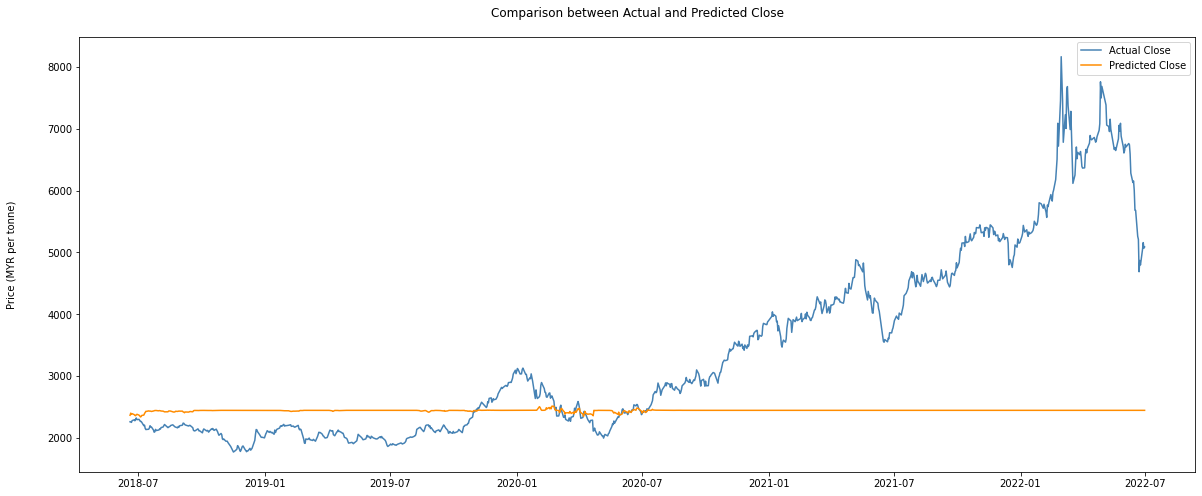

In [ ]:
# visualize the actual and predicted close price
plt.figure(figsize=(20, 8))
plt.plot(df['Actual Close'],label='Actual Close',color='steelblue')
plt.plot(df['Prediction'], label='Predicted Close',color='darkorange')
plt.title('Comparison between Actual and Predicted Close', pad = 20)
plt.ylabel('Price (MYR per tonne)', rotation = 90, labelpad = 30)
plt.legend(loc=0)
plt.show()

## Section 4.2: Support Vector Regression **with** Hyperparameter Tuning

In [ ]:
# hyperparameters that are kept constant during the tuning process
const_param = {}
const_param['kernel'] = 'rbf' # use rbf kernel for svr model
const_param['cache_size'] = 500

In [ ]:
# hyperparameter search space
param_dict = {}
param_dict['C'] = tuple(range(1, 10**6 + 1))            # the larger the better 
param_dict['gamma'] = tuple(10**-x  for x in range(2, 21))    # max. python can accept is 32, where only these are larger than 0
param_dict['epsilon'] = tuple(10**-x  for x in range(2, 21))  # float - small; smallest can get is 1E-32

In [ ]:
# size of hyperparameter search space is the 40% of the original size
param_size = {}
for key in [*param_dict.keys()]:
    param_size[key] = ceil(len(param_dict[key])*0.4)

In [ ]:
# define the inputs for SA
SA_parameters = {
    # the hyperparameters that will be tuned
    "param_dict": param_dict,
    # the hyperparameters that will be kept constant
    "constant_params": const_param,
    # the size of search space for each hyperparemeter
    "size_param_dict":param_size,
    # features - training data
    "X_train": x_train,
    # target - training data
    "Y_train": y_train,
    # features - testing data
    "X_valid": x_test,
    # target - testing data
    "Y_valid": y_test,
    # no. of iterations for each run in the algorithm
    "no_iters": 100,
    # alpha value that controls how the temperature reduces
    "alpha": 0.75,
    # the initial temperature of the algorithm
    "initial_temperature": 100,
    # the minimum temperature that the algorthm needs to achieve
    "min_temperature": 30,
}

In [ ]:
# run the simulated annealing function (in SA_parameter_optimization.py) to obtain the best solution;
# two empty lists are created to store the execution time and result output from the algorithm for each run
process_time_list = np.array([])
result_list = []
for i in range(30):
  print(f"\n\nRun {i+1}\n")
  # starting time is recorded
  start_time = time.time()
  # result from the SA is obtained
  result = simulate_annealing(**SA_parameters)
  # ending time is recorded
  end_time = time.time()
  # obtained result is added to the list after each run 
  result_list.append(result)
  # execution time is calculated difference between starting and ending time
  time_difference = end_time - start_time
  # execution time is added to the numpy.array after each run 
  process_time_list = np.append(process_time_list, time_difference)

Streaming output truncated to the last 5000 lines.
Random Number:   0.896424




Iteration 48
Local Improvement in metric from 8.768741 to 6.756433  - parameters accepted



Iteration 49
Local Improvement in metric from 6.756433 to 4.338738  - parameters accepted



Iteration 50
No Improvement but parameters are ACCEPTED.
Metric change:   0.008228
Threshold:       0.999805
Random Number:   0.178853




Iteration 51
Local Improvement in metric from 4.346966 to 4.338738  - parameters accepted



Iteration 52
No Improvement and parameters are REJECTED.
Metric change:   197.442760
Threshold:       0.009278
Random Number:   0.800603




Iteration 53
No Improvement but parameters are ACCEPTED.
Metric change:   33.526634
Threshold:       0.451714
Random Number:   0.379143




Iteration 54
No Improvement but parameters are ACCEPTED.
Metric change:   0.000000
Threshold:       1.000000
Random Number:   0.582402




Iteration 55
No Improvement and parameters are REJECTED.
Metric change:   163.916

In [ ]:
# obtain the mean execution time of all the runs and convert it into struct_time object
mean_process_time = time.gmtime(np.mean(process_time_list))
# strftime() function is used to format the execution time of struct_time object
formatted_time = time.strftime("%H hours %M minutes %S seconds", mean_process_time)
# print mean execution time
print(f'Average Execution time: {formatted_time}.')

Average Execution time: 00 hours 02 minutes 38 seconds.


In [ ]:
# combine all the result lists together
final_result = pd.concat(result_list).reset_index().drop(columns = 'index')
# print the result of all runs
final_result

,Number of Temperature Reductions,Current Temperature,C,gamma,epsilon,Metric,Best Metric
0,0,100.000000,700487,0.00001,0.0,19.678505,19.678505
1,0,100.000000,726152,0.00001,0.0,17.313501,17.313501
2,0,100.000000,726152,0.00001,0.0,17.310213,17.310213
3,0,100.000000,726152,0.00001,0.01,11.401956,11.401956
4,0,100.000000,726152,0.001,0.01,960.717329,11.401956
...,...,...,...,...,...,...,...
14995,4,31.640625,1000000,0.00001,0.0,4.827601,0.575784
14996,4,31.640625,1000000,0.00001,0.0,4.85433,0.575784
14997,4,31.640625,1000000,0.001,0.0,1270.192171,0.575784
14998,4,31.640625,1000000,0.0,0.0,200.022753,0.575784


In [ ]:
# obtain the best result which is the one with minimum Best Metric
best_result = final_result[final_result["Metric"] == final_result["Best Metric"].min()]
best_result

,Number of Temperature Reductions,Current Temperature,C,gamma,epsilon,Metric,Best Metric
4548,0,100.0,667260,0.000001,0.0,0.549951,0.549951


In [ ]:
# find the best hyperparameters
best_parameters = {}
# when there are more than one set of hyperparameters have the same metric, take the mean of the value for those hyperparameters
for parameter in [*param_dict.keys()]:
  best_parameters[parameter] = best_result[parameter].mean()
print(best_parameters)

{'C': 667260.0, 'gamma': 1e-06, 'epsilon': 1e-14}


In [ ]:
# print the regression metrics of the fine-tuned SVR
# best_parameters.update(const_param)
# best_model = SVR(**best_parameters).fit(x_train, y_train)
best_model = SVR(C=741709, gamma = 1e-06,epsilon = 1e-07).fit(x_train, y_train)
preds = best_model.predict(x_test)
RegressionMetric(y_test, preds)

MAE:	 0.5505039204799923
MAPE:	 0.9413425715619347
RMSE:	 0.752748164968567
r2:	 0.9962325635163028


In [ ]:
df1 = inverse_transformation(y_test, preds, scalerY, time_index)
df1

,Transformed Actual,Transformed Prediction,Actual Close,Prediction
Date,,,,
2018-06-19,-2.879019,-2.075230,2264.0,2311.993897
2018-06-20,-2.930189,-2.805551,2261.0,2268.318716
2018-06-21,-3.050020,-2.851612,2254.0,2265.609545
2018-06-22,-2.557503,-2.852820,2283.0,2265.538535
2018-06-25,-2.356689,-2.709935,2295.0,2273.959579
...,...,...,...,...
2022-06-24,20.136965,21.165516,4798.0,5012.173163
2022-06-27,21.335145,21.072156,5049.0,4992.092028
2022-06-28,21.829972,21.940854,5159.0,5184.188271


In [ ]:
# print the regression metrics of the fine-tuned SVR on the original scale
RegressionMetric(df1['Actual Close'], df1['Prediction'])

MAE:	 98.49057210570876
MAPE:	 0.0210306604106216
RMSE:	 205.62115151047624
r2:	 0.9813085267129428


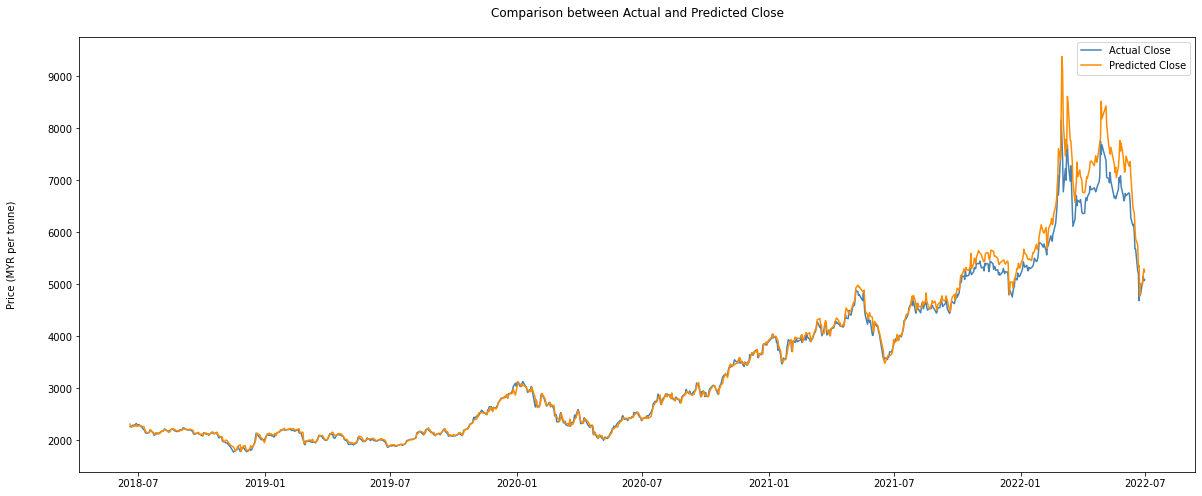

In [ ]:
# visualize the actual and predicted close price
plt.figure(figsize=(20, 8))
plt.plot(df1['Actual Close'],label='Actual Close',color='steelblue')
plt.plot(df1['Prediction'], label='Predicted Close',color='darkorange')
plt.title('Comparison between Actual and Predicted Close', pad = 20)
plt.ylabel('Price (MYR per tonne)', rotation = 90, labelpad = 30)
plt.legend(loc=0)
plt.show()

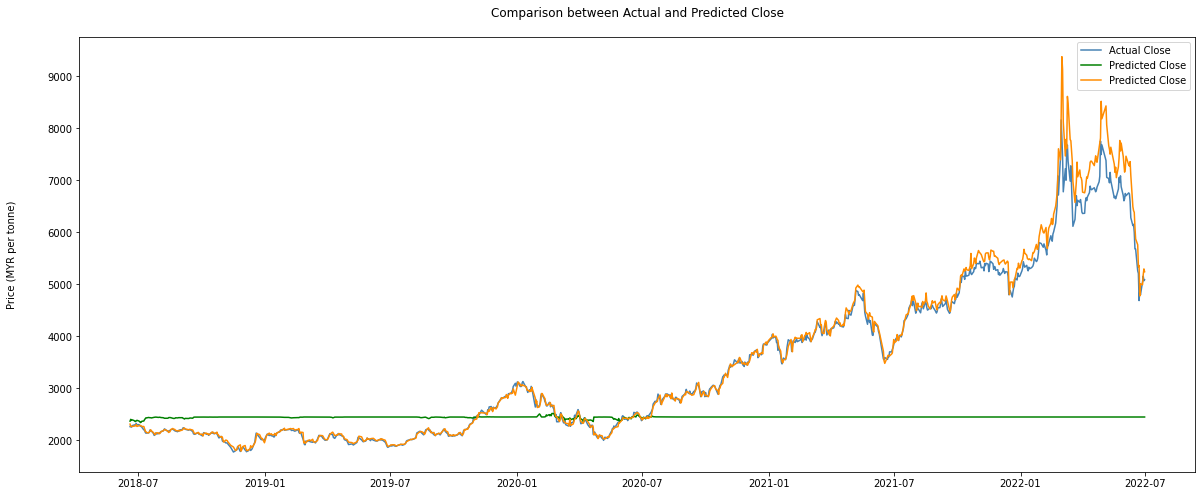

In [ ]:
# visualize the actual and predicted close price
plt.figure(figsize=(20, 8))
plt.plot(df1['Actual Close'],label='Actual Close',color='steelblue')
plt.plot(df['Prediction'], label='Predicted Close',color='g')
plt.plot(df1['Prediction'], label='Predicted Close',color='darkorange')
plt.title('Comparison between Actual and Predicted Close', pad = 20)
plt.ylabel('Price (MYR per tonne)', rotation = 90, labelpad = 30)
plt.legend(loc=0)
plt.show()

## Section 4.3: Result Output

In [ ]:
# output the result to a csv file
final_result.to_csv("result.csv", index = False)